In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
import glob

from sklearn.preprocessing import MinMaxScaler, StandardScaler
import pandas as pd

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Dropout
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasRegressor, KerasClassifier
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam


In [2]:
#data = pd.read_pickle('C:/Users/erikm/Desktop/Diplomarbeit Erik Marr/Daten/Finish/TPath_300_finish_data.pkl')
data = pd.read_pickle('C:/Users/erikm/Desktop/Diplomarbeit Erik Marr/Daten/Finish_D3_I7000_F9000/TPath_300_finish_data_D3.pkl')

data

,X-Koordinate,Y-Koordinate,Zeitpunkt,Strom,Kraft,Temperatur
0,0.000,-0.00200,300,7000,9000,532.25
1,0.000,-0.00196,300,7000,9000,549.09
2,0.000,-0.00192,300,7000,9000,565.57
3,0.000,-0.00188,300,7000,9000,581.72
4,0.000,-0.00184,300,7000,9000,597.71
...,...,...,...,...,...,...
7663,0.003,0.00180,300,7000,9000,653.01
7664,0.003,0.00184,300,7000,9000,653.11
7665,0.003,0.00188,300,7000,9000,653.16
7666,0.003,0.00196,300,7000,9000,422.17


In [3]:
df = data.drop(data.columns[2:5], axis = 1)
df

,X-Koordinate,Y-Koordinate,Temperatur
0,0.000,-0.00200,532.25
1,0.000,-0.00196,549.09
2,0.000,-0.00192,565.57
3,0.000,-0.00188,581.72
4,0.000,-0.00184,597.71
...,...,...,...
7663,0.003,0.00180,653.01
7664,0.003,0.00184,653.11
7665,0.003,0.00188,653.16
7666,0.003,0.00196,422.17


In [4]:
df1 = df.sample(frac=1, random_state=42)  # Hier wird 42 als Random State verwendet, um die Ergebnisse reproduzierbar zu machen

print(df1)
df_reset = df1.reset_index(drop=True)
df_reset

      X-Koordinate  Y-Koordinate  Temperatur
2029       0.00080      -0.00164      674.04
2882       0.00112       0.00016      881.03
2748       0.00108      -0.00116      804.41
5559       0.00220      -0.00184      632.64
1728       0.00068      -0.00156      700.73
...            ...           ...         ...
5226       0.00204       0.00100      769.47
5390       0.00212      -0.00052      788.09
860        0.00032       0.00008      909.37
7603       0.00300      -0.00060      657.04
7270       0.00288      -0.00192      672.51

[7668 rows x 3 columns]


,X-Koordinate,Y-Koordinate,Temperatur
0,0.00080,-0.00164,674.04
1,0.00112,0.00016,881.03
2,0.00108,-0.00116,804.41
3,0.00220,-0.00184,632.64
4,0.00068,-0.00156,700.73
...,...,...,...
7663,0.00204,0.00100,769.47
7664,0.00212,-0.00052,788.09
7665,0.00032,0.00008,909.37
7666,0.00300,-0.00060,657.04


In [5]:
label = df_reset["Temperatur"]
# Korrektur: Verwenden Sie den Spaltennamen direkt, ohne Indexierung der columns-Eigenschaft
df1 = df_reset.drop("Temperatur", axis=1)
X = df1
y = label


In [6]:
X

,X-Koordinate,Y-Koordinate
0,0.00080,-0.00164
1,0.00112,0.00016
2,0.00108,-0.00116
3,0.00220,-0.00184
4,0.00068,-0.00156
...,...,...
7663,0.00204,0.00100
7664,0.00212,-0.00052
7665,0.00032,0.00008
7666,0.00300,-0.00060


In [7]:
y

0       674.04
1       881.03
2       804.41
3       632.64
4       700.73
         ...  
7663    769.47
7664    788.09
7665    909.37
7666    657.04
7667    672.51
Name: Temperatur, Length: 7668, dtype: float64

In [8]:
 # train_df enthält 80% der Daten, test_df enthält 20% der Daten
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


In [11]:
# Initialisiere einen MinMaxScaler für die Features
scaler_features = MinMaxScaler()
scaler_features2 = MinMaxScaler()
# Skaliere X_train und X_test
X_train_scaled = scaler_features.fit_transform(X_train)
X_test_scaled = scaler_features.transform(X_test)  # Nutze gleiche Skalierungsparameter ohne das X_Test Informationen einfließen

# Initialisiere einen SEPARATEN MinMaxScaler für das Ziel, wenn nötig
scaler_target = MinMaxScaler()


# Skaliere y_train und y_test. Beachte, dass y_train.reshape(-1, 1) verwendet wird, da MinMaxScaler 
# erwartet, dass die Eingaben als 2D-Arrays kommen, und Ziele normalerweise als 1D-Arrays vorliegen.
y_train_scaled = scaler_target.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler_target.transform(y_test.values.reshape(-1, 1))


In [12]:
X_train_scaled

array([[0.41333333, 0.28      ],
       [0.96      , 0.27      ],
       [0.56      , 0.24      ],
       ...,
       [0.84      , 0.45      ],
       [0.26666667, 0.41      ],
       [0.72      , 0.57      ]])

In [13]:
y_train_scaled.max()

1.0

In [14]:
# Lernplan erstellen
#initial_learning_rate = 0.1
#lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
#    initial_learning_rate, decay_steps=100, decay_rate=0.9, staircase=True)

In [15]:
# Netzwerkarchitektur
model = Sequential([
    # Eingabeschicht
    Dense(32, activation='relu', input_shape=(2,), kernel_initializer='he_uniform', kernel_regularizer=l2(0.01)),
    #Dropout(0.01),
    # Versteckte Schicht
    #Dense(8, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(0.01)),
    #Dropout(0.01),
    # Ausgabeschicht für Regression (1 Einheit ohne Aktivierungsfunktion)
    Dense(1 , activation = 'linear')
])

# Optimierer
optimizer = 'adam' #Adam(learningrate =  0.001)

# Modell kompilieren (Verwendung von mean_squared_error als Verlustfunktion für Regression)
model.compile(optimizer=optimizer,
              loss='mean_squared_error',
              metrics=['mae'])  # Metriken für Regression: Mean Absolute Error und Mean Squared Error

# Early Stopping Callback
early_stopping = EarlyStopping(monitor='loss', patience=5, verbose=1, mode='min', restore_best_weights=True, min_delta = 0.0001)

# Trainingsparameter
batch_size = 50
epochs = 100

# Modell trainieren (Annahme: X_train, y_train, X_val, y_val sind vordefiniert)
history = model.fit(X_train_scaled, y_train_scaled,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_split=0.2,
                    callbacks=[early_stopping])

Epoch 1/100
99/99 [==============================] - 1s 2ms/step - loss: 0.6415 - mae: 0.2866 - val_loss: 0.5693 - val_mae: 0.2478
Epoch 2/100
99/99 [==============================] - 0s 1ms/step - loss: 0.5148 - mae: 0.2213 - val_loss: 0.4601 - val_mae: 0.1939
Epoch 3/100
99/99 [==============================] - 0s 1ms/step - loss: 0.4185 - mae: 0.1757 - val_loss: 0.3763 - val_mae: 0.1567
Epoch 4/100
99/99 [==============================] - 0s 1ms/step - loss: 0.3436 - mae: 0.1455 - val_loss: 0.3098 - val_mae: 0.1325
Epoch 5/100
99/99 [==============================] - 0s 1ms/step - loss: 0.2830 - mae: 0.1236 - val_loss: 0.2550 - val_mae: 0.1123
Epoch 6/100
99/99 [==============================] - 0s 1ms/step - loss: 0.2328 - mae: 0.1058 - val_loss: 0.2097 - val_mae: 0.0965
Epoch 7/100
99/99 [==============================] - 0s 1ms/step - loss: 0.1917 - mae: 0.0930 - val_loss: 0.1728 - val_mae: 0.0876
Epoch 8/100
99/99 [==============================] - 0s 957us/step - loss: 0.1581 -

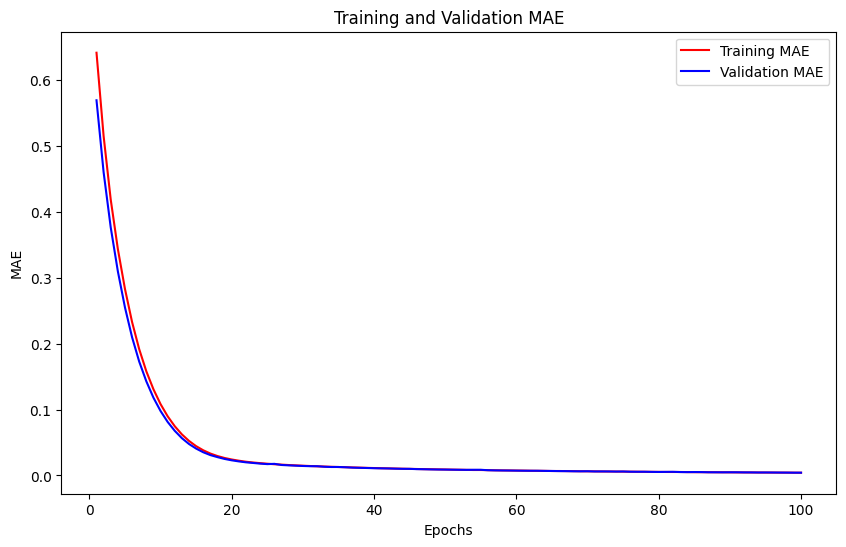

In [16]:
mae = history.history['loss']
val_mae = history.history['val_loss']

epochs = range(1, len(mae) + 1)

# MAE Diagramm
plt.figure(figsize=(10, 6))
plt.plot(epochs, mae, 'r', label='Training MAE')
plt.plot(epochs, val_mae, 'b', label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.show()

In [17]:
scaled_predicted_values = model.predict(X_test_scaled, verbose = 0)

# Führen Sie die Rücktransformation der skalierten Werte durch
original_predicted_values = scaler_target.inverse_transform(scaled_predicted_values)
original_actual_values = scaler_target.inverse_transform(y_test_scaled)  # y_test sind die skalierten tatsächlichen Werte
print(f' Bsp. Predicted: {original_predicted_values[100]} Actual: {original_actual_values[100]} ')

def calculate_mae(list1, list2):
    # Stelle sicher, dass beide Listen die gleiche Länge haben
    if len(list1) != len(list2):
        raise ValueError("Listen müssen die gleiche Länge haben")
    
    # Berechne die absolute Differenz zwischen den Elementen der Listen
    differences = [abs(x - y) for x, y in zip(list1, list2)]
    
    # Berechne den Durchschnitt der absoluten Differenzen
    mae = sum(differences) / len(differences)
    
    return mae

# Beispiel
list1 = original_predicted_values
list2 = original_actual_values

mae = calculate_mae(list1, list2)
print(f"Durchschnittliche Abweichung (MAE): {mae}")

 Bsp. Predicted: [575.2932] Actual: [653.16] 
Durchschnittliche Abweichung (MAE): [11.50445812]


# GridSearch

In [11]:
# Schritt 1: Definiere dein Modell als eine Funktion, die Hyperparameter akzeptiert
def build_model(optimizer='adam', activation='relu'):
    model = Sequential()
    model.add(Dense(units=64, activation=activation, input_dim=X_train_scaled.shape[1]))
    model.add(Dense(units=32, activation=activation))
    model.add(Dense(units=1, activation='linear'))
    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mean_squared_error'])
    return model

# Schritt 2: Erstelle eine Instanz von KerasRegressor ohne batch_size und epochs im param_grid
model = KerasRegressor(model=build_model, verbose=1)

# Schritt 3: Definiere den Parameter-Raum für die Grid-Suche OHNE batch_size und epochs
param_grid = {
    'model__optimizer': ['adam', 'sgd'],
    'model__activation': ['relu', 'tanh']
}

# Optional: Definiere Fit-Parameter (wie batch_size und epochs) separat
fit_params = {
    'batch_size': 32,
    'epochs': 10
}

# Schritt 4: Führe GridSearchCV aus mit fit_params, wenn nötig
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train_scaled, y_train_scaled, **fit_params)

# Ergebnisse ausgeben
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
for mean_score, params in zip(grid_result.cv_results_['mean_test_score'], grid_result.cv_results_['params']):
    print("%f with: %r" % (mean_score, params))




Epoch 1/10


3025/3025 [==============================] - 6s 2ms/step - loss: 0.0097 - mean_squared_error: 0.0097
Epoch 2/10
3025/3025 [==============================] - 5s 2ms/step - loss: 0.0026 - mean_squared_error: 0.0026
Epoch 3/10
3025/3025 [==============================] - 5s 2ms/step - loss: 0.0025 - mean_squared_error: 0.0025
Epoch 4/10
3025/3025 [==============================] - 5s 2ms/step - loss: 0.0025 - mean_squared_error: 0.0025
Epoch 5/10
3025/3025 [==============================] - 5s 2ms/step - loss: 0.0025 - mean_squared_error: 0.0025
Epoch 6/10
3025/3025 [==============================] - 5s 2ms/step - loss: 0.0025 - mean_squared_error: 0.0025
Epoch 7/10
3025/3025 [==============================] - 5s 2ms/step - loss: 0.0025 - mean_squared_error: 0.0025
Epoch 8/10
3025/3025 [==============================] - 5s 2ms/step - loss: 0.0025 - mean_squared_error: 0.0025
Epoch 9/10
3025/3025 [==============================] - 5s 2ms/step - loss: 0.0025 - mean_squared_er

In [12]:
def build_model(optimizer='adam', activation='relu'):
    model = Sequential()
    model.add(Dense(units=64, activation=activation, input_dim=X_train_scaled.shape[1]))
    model.add(Dense(units=32, activation=activation))
    model.add(Dense(units=1, activation='linear'))
    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mean_squared_error'])
    return model

model = KerasRegressor(model=build_model, verbose=1)

param_grid = {
    'model__optimizer': ['adam', 'sgd'],
    'model__activation': ['relu', 'tanh'],
    'fit__batch_size': [10, 20, 32],  # Testen verschiedener batch_size Werte
    'fit__epochs': [5, 10]  # Optional: Testen verschiedener epoch Werte
}

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train_scaled, y_train_scaled)

# Ergebnisse ausgeben
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
for mean_score, params in zip(grid_result.cv_results_['mean_test_score'], grid_result.cv_results_['params']):
    print("%f with: %r" % (mean_score, params))


Epoch 1/5
4840/4840 [==============================] - 10s 2ms/step - loss: 0.0053 - mean_squared_error: 0.0053
Epoch 2/5
4840/4840 [==============================] - 9s 2ms/step - loss: 0.0026 - mean_squared_error: 0.0026
Epoch 3/5
4840/4840 [==============================] - 8s 2ms/step - loss: 0.0026 - mean_squared_error: 0.0026
Epoch 4/5
4840/4840 [==============================] - 8s 2ms/step - loss: 0.0025 - mean_squared_error: 0.0025
Epoch 5/5
4840/4840 [==============================] - 8s 2ms/step - loss: 0.0025 - mean_squared_error: 0.0025
Best: 0.845704 using {'fit__batch_size': 20, 'fit__epochs': 5, 'model__activation': 'relu', 'model__optimizer': 'adam'}
0.840889 with: {'fit__batch_size': 10, 'fit__epochs': 5, 'model__activation': 'relu', 'model__optimizer': 'adam'}
0.834983 with: {'fit__batch_size': 10, 'fit__epochs': 5, 'model__activation': 'relu', 'model__optimizer': 'sgd'}
0.833309 with: {'fit__batch_size': 10, 'fit__epochs': 5, 'model__activation': 'tanh', 'model__opt